In [1]:
import cv2
import numpy as np 
import json
import matplotlib.pyplot as plt

In [ ]:
points_per

In [18]:
#read bounding boxes
import json
with open('boxes/camera2.txt','r') as f:
    data = json.load(f)
    f.close()
points_per_frame = []
for frame in data:
    temp = []
    for frame_data in frame:
        dic = {}
        dic['class'] = frame_data['class']
        dic['pointx'] = frame_data['start_X'] + (frame_data['width']/2)
        dic['pointy'] = frame_data['start_Y'] + (frame_data['height']/2)
        temp.append(dic)
    points_per_frame.append(temp)

In [19]:
points_per_frame[0]

[{'class': 'standing', 'pointx': 491.0, 'pointy': 157.0},
 {'class': 'standing', 'pointx': 295.0, 'pointy': 192.0},
 {'class': 'standing', 'pointx': 449.0, 'pointy': 159.5},
 {'class': 'walking', 'pointx': 457.5, 'pointy': 194.0},
 {'class': 'walking', 'pointx': 359.0, 'pointy': 228.0}]

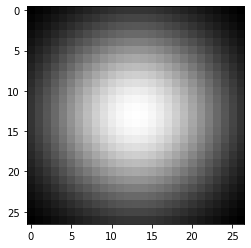

In [20]:
#gaussian kernel
ksize = 27
std = 0.3*((ksize-1)*0.5 - 1) + 0.8 
x = cv2.getGaussianKernel(ksize,8)
x = (x*x.T)
x=x/np.max(x)
plt.imshow(x,cmap='gray')

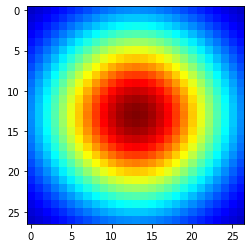

In [21]:
width = 600
height = 300
img = np.zeros((height,width,3),dtype=np.float32)
colored = cv2.applyColorMap((x*255).astype(np.uint8),cv2.COLORMAP_JET)
colored = cv2.cvtColor(colored,cv2.COLOR_BGR2RGB).astype(np.float32)/255
plt.imshow(colored)

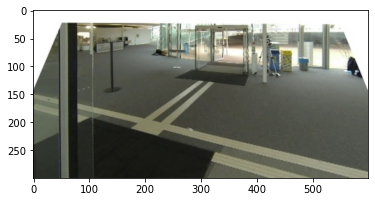

In [6]:
img2  = cv2.cvtColor(cv2.imread('cam2.jpeg'),cv2.COLOR_BGR2RGB)/255
img2 = cv2.resize(img2,(600,300))
plt.imshow(img2)

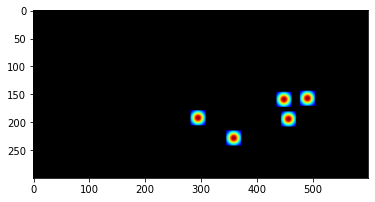

In [23]:
for i in points_per_frame[0]:
    if i['pointy']+int(ksize/2) >= 300 or i['pointx'] + int(ksize/2) >= 600:
        continue
    point_on_img = img[int(i['pointy'])-int(ksize/2):int(i['pointy'])+ int(ksize/2) + 1,int(i['pointx'])-int(ksize/2):int(i['pointx'])+ int(ksize/2) + 1,:]
    new_points =(point_on_img + colored)
    img[int(i['pointy'])-int(ksize/2):int(i['pointy'])+ int(ksize/2) + 1,int(i['pointx'])-int(ksize/2):int(i['pointx'])+ int(ksize/2) + 1,:] = new_points
img /= img.max(axis=(0,1))
plt.imshow(img)

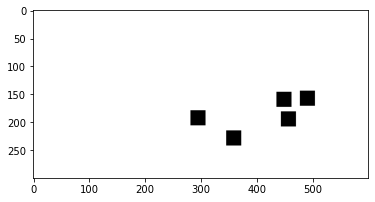

In [27]:
gray_img = cv2.cvtColor(img,cv2.COLOR_RGB2GRAY)
mask = np.where(gray_img > 0.01,1.0,0.0)
inv_mask = np.where(gray_img > 0.01,0.0,1.0)
plt.imshow(inv_mask,cmap='gray')

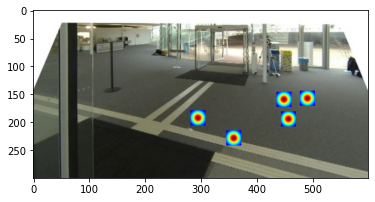

In [25]:
inv_mask2 = np.ones((300,600,3),dtype=np.float32) * ((inv_mask)[:,:,None])
plt.imshow(((inv_mask2*img2)+img))


In [34]:
a

NameError: name 'a' is not defined